In [170]:
import pandas as pd
import numpy as np


In [171]:
pd.Timestamp('15th of August, 1947')

Timestamp('1947-08-15 00:00:00')

In [172]:
pd.to_datetime('08/04/1947', dayfirst=True)

Timestamp('1947-04-08 00:00:00')

In [173]:
oil_url = 'https://andybek.com/pandas-oil'

In [174]:
brent = pd.read_csv(oil_url)

In [175]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.5+ KB


# Date Parsing and Datetime Index

In [176]:
brent.Date = brent.Date.astype('datetime64[s]')

In [177]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Date    5016 non-null   datetime64[s]
 1   Price   5016 non-null   float64      
dtypes: datetime64[s](1), float64(1)
memory usage: 78.5 KB


In [178]:
#set date column as the index

In [179]:
brent.set_index('Date', inplace=True)

In [180]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[s]', name='Date', length=5016, freq=None)

# Parse during csv read

In [181]:
brent2 = pd.read_csv(oil_url, parse_dates=['Date'], index_col='Date')

<ipython-input-181-459152754>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent2 = pd.read_csv(oil_url, parse_dates=['Date'], index_col='Date')


In [182]:
brent2.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

# Indexing Dates

In [183]:
#Access using dates - e.g. Select all oil prices in Jan 2019

In [184]:
#Option 1 - Using slicer

In [185]:
brent.loc['2019-01-01':'2019-01-31']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [186]:
#Option 2 - Using Partial String Indexing

In [187]:
brent.loc['2019-01']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
2019-01-09,59.46
2019-01-10,60.47
2019-01-11,59.24
2019-01-14,58.80


In [188]:
#Using partial string indeices in slicer

In [189]:
brent['2019-01':'2019-03']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
...,...
2019-03-25,67.37
2019-03-26,67.51
2019-03-27,67.35


In [190]:
brent.loc['2019-01':'2019-04-15']

,Price
Date,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
...,...
2019-04-09,71.02
2019-04-10,71.63
2019-04-11,71.30


# Skill Challenge

In [191]:
#Create a shorter dataframe that only contains dates from 1 December 2015 to 31 March 2016

In [192]:
brent.loc['2015-12':'2016-03']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


In [193]:
#Find the standard deviation of prices during this period

In [194]:
brent.loc['2015-12':'2016-03'].std()

,0
Price,3.990123


In [195]:
#Check if the mean price from February 2018 is less than median price from March 2017

In [196]:
brent.loc['2018-02'].mean() < brent.loc['2017-03'].median()

,0
Price,False


# DateTime Index Accessors

In [197]:
brent.index.quarter

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='Date', length=5016)

In [198]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

In [199]:
brent.groupby(brent.index.day_name()).mean().idxmin()

,0
Price,Monday


In [200]:
#Average Brent oil price in all leap years

In [201]:
brent.index.is_leap_year

array([ True,  True,  True, ..., False, False, False])

In [202]:
brent.loc[(brent.index.is_leap_year) & (brent.index.month == 2)].mean()

,0
Price,60.696634


# Creating Date Range

In [203]:
pd.date_range(start='5/5/2020',end='6/20/2020')

DatetimeIndex(['2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01',
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
               '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19', '2020-06-20'],
              dtype='datetime64[ns]', freq='D')

In [204]:
pd.date_range(start='5/5/2020',periods=10) #Period of 10 days

DatetimeIndex(['2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14'],
              dtype='datetime64[ns]', freq='D')

In [205]:
pd.date_range(start='5/5/2020',periods=10, freq='w') #Period of 10 weeks

<ipython-input-205-236790847>:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  pd.date_range(start='5/5/2020',periods=10, freq='w') #Period of 10 weeks


DatetimeIndex(['2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [206]:
pd.date_range(start='5/5/2020',periods=10, freq='3w') #Period of every 3 weeks

<ipython-input-206-2419839742>:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  pd.date_range(start='5/5/2020',periods=10, freq='3w') #Period of every 3 weeks


DatetimeIndex(['2020-05-10', '2020-05-31', '2020-06-21', '2020-07-12',
               '2020-08-02', '2020-08-23', '2020-09-13', '2020-10-04',
               '2020-10-25', '2020-11-15'],
              dtype='datetime64[ns]', freq='3W-SUN')

In [207]:
pd.date_range(end='5/5/2020',periods=10)

DatetimeIndex(['2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04', '2020-05-05'],
              dtype='datetime64[ns]', freq='D')

# Shifting Dates by DateOffset

In [208]:
dob = pd.Timestamp('1975-07-28')

In [209]:
dob + pd.DateOffset(years=10)

Timestamp('1985-07-28 00:00:00')

# Shifting dates by TimeDelta function

In [210]:
dob + pd.Timedelta(days=3, hours=4)

Timestamp('1975-07-31 04:00:00')

In [211]:
dob + pd.DateOffset(months=3, hours=4)

Timestamp('1975-10-28 04:00:00')

# Resampling and Unsampling Time Series

In [212]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [213]:
#Downsample the time series from day to month

In [214]:
df = brent.resample('ME').mean()

In [215]:
df

,Price
Date,
2000-01-31,25.511000
2000-02-29,27.775714
2000-03-31,27.486087
2000-04-30,22.764444
2000-05-31,27.737619
...,...
2019-05-31,71.317727
2019-06-30,64.220500
2019-07-31,63.919130


<Axes: xlabel='Date'>

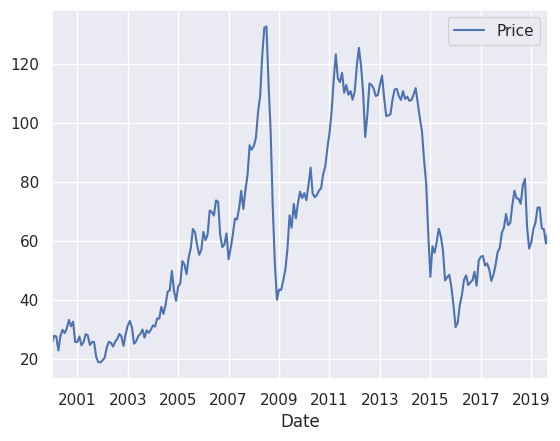

In [216]:
df.plot()

<Axes: xlabel='Date'>

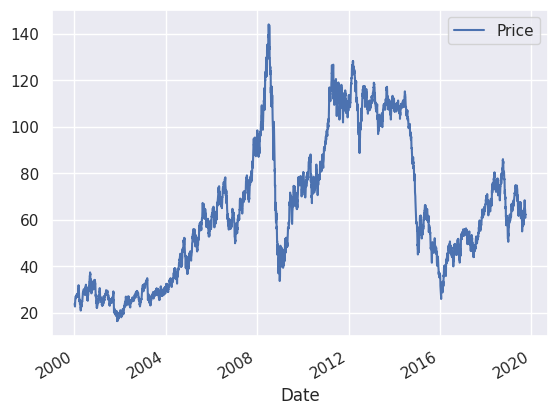

In [217]:
brent.plot()

In [218]:
import seaborn as sns

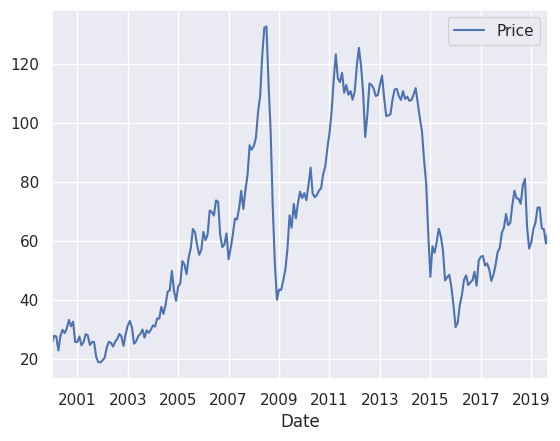

In [219]:
df.plot()
sns.set()

<Axes: xlabel='Date'>

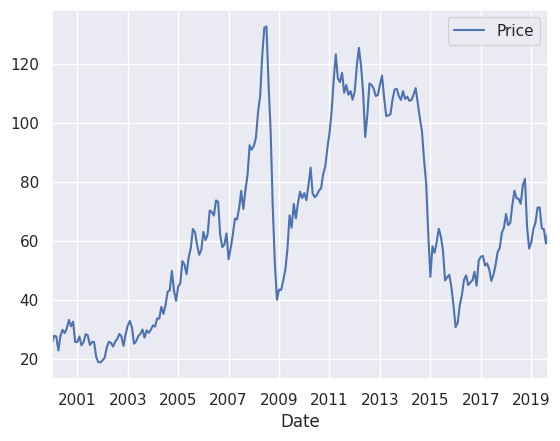

In [220]:
brent.resample('BME').mean().plot()

In [221]:
brent.resample('BQE').mean()

,Price
Date,
2000-03-31,26.963906
2000-06-30,27.012295
2000-09-29,30.659692
2000-12-29,29.917937
2001-03-30,25.824219
...,...
2018-09-28,75.070154
2018-12-31,68.763871
2019-03-29,63.097302


In [222]:
#Upsampling Time Series
brent.resample('8H').mean()

<ipython-input-222-3642495678>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').mean()


,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


In [223]:
brent.resample('8H').interpolate(method='linear')

<ipython-input-223-1275474036>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').interpolate(method='linear')


,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


In [224]:
brent.resample('8H').interpolate(method='spline',order=3)

<ipython-input-224-2311536800>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('8H').interpolate(method='spline',order=3)


,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


In [225]:
brent.resample('2H').interpolate(method='akima')

<ipython-input-225-3765111267>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  brent.resample('2H').interpolate(method='akima')


,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 02:00:00,23.928478
2000-01-04 04:00:00,23.907269
2000-01-04 06:00:00,23.886406
2000-01-04 08:00:00,23.865926
...,...
2019-09-29 16:00:00,61.289907
2019-09-29 18:00:00,61.217787
2019-09-29 20:00:00,61.143750


In [226]:
#using asfreq method
brent.asfreq('ME',method='ffill')

,Price
Date,
2000-01-31,27.08
2000-02-29,29.01
2000-03-31,23.98
2000-04-30,23.79
2000-05-31,29.64
...,...
2019-05-31,66.78
2019-06-30,67.52
2019-07-31,64.07


# Rolling Windows

<Axes: xlabel='Date'>

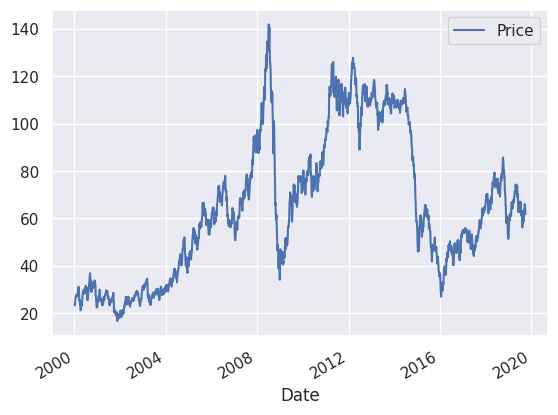

In [227]:
brent.rolling(window=3).mean().plot()

In [228]:
from matplotlib import pyplot as plt

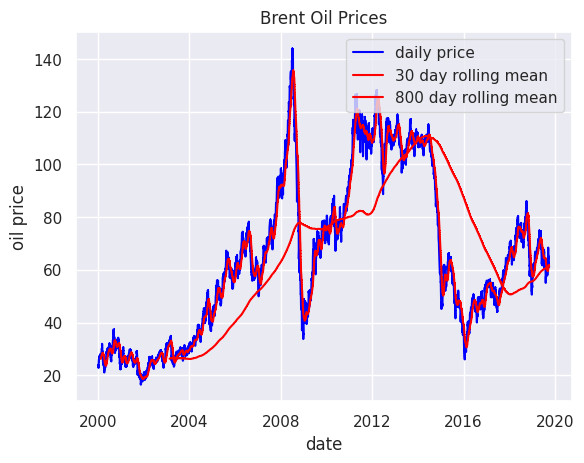

In [229]:
fig, ax = plt.subplots()

ax.plot(brent,marker=',',color='blue',label='daily price')
ax.plot(brent.rolling(window=30).mean(),marker=',',color='red',label='30 day rolling mean')
ax.plot(brent.rolling(window=800).mean(),marker=',',color='red',label='800 day rolling mean')
ax.legend()
ax.set_ylabel('oil price')
ax.set_xlabel('date')
ax.set_title('Brent Oil Prices')
plt.show()

# Skill Challenge

In [230]:
#Add a new column called Quarter to the brent dataframe that contains each date's respective quarters.

In [235]:
brent.sample(10)

,Price,Quarter
Date,,
2008-12-24,34.45,4
2009-09-16,68.51,3
2001-08-09,25.28,3
2008-10-29,64.00,4
2010-02-02,73.94,1
2004-01-21,31.95,1
2009-11-12,75.18,4
2019-05-10,71.63,2
2017-07-03,49.13,3


In [245]:
brent['Quarter'] = brent.index.quarter

In [246]:
#Using the Quarter column and groupby method calculate the average price and standard deviation for each quarter of the year 2014.

In [247]:
brent.loc['2014'].groupby(by='Quarter').agg(['mean','std'])

Price           
               mean        std
Quarter                       
1        108.141935   1.280641
2        109.694063   2.406442
3        101.899844   4.364868
4         76.429219  11.410171

In [250]:
brent.loc['2014'].groupby('Quarter').agg(average_price=('Price','mean'),std_price = ('Price','std'))

,average_price,std_price
Quarter,,
1,108.141935,1.280641
2,109.694063,2.406442
3,101.899844,4.364868
4,76.429219,11.410171


In [248]:
#Reproduce the Price average and standard deviation using resample without relying on quarter column

In [242]:
brent.loc['2014'].resample('QE').agg({'Price':['mean','std']})

Price           
                  mean        std
Date                             
2014-03-31  108.141935   1.280641
2014-06-30  109.694063   2.406442
2014-09-30  101.899844   4.364868
2014-12-31   76.429219  11.410171

In [243]:
brent[brent.index.year == 2014].reset_index().groupby(by='Quarter').agg({'Date':'first', 'Price':['mean','std']})

Date       Price           
             first        mean        std
Quarter                                  
1       2014-01-02  108.141935   1.280641
2       2014-04-01  109.694063   2.406442
3       2014-07-01  101.899844   4.364868
4       2014-10-01   76.429219  11.410171